<a href="https://colab.research.google.com/github/leekate/2020-ctrc-OralCancer-Classification-project/blob/master/Oral_Detect_my_ResNet_Contrast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

!pip uninstall keras
!pip install Keras==2.2.4

!pip uninstall tensorflow
!pip install tensorflow==1.13.1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Original Data and Contrast

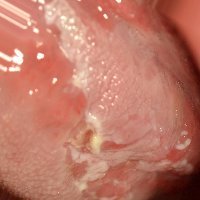

In [ ]:
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

example_img=cv2.imread("/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/train/1.Cancer/can_1.jpg_0_2811.jpg")
example_img=cv2.resize(example_img,dsize=(200,200),interpolation=cv2.INTER_LINEAR)

cv2_imshow(example_img)

In [ ]:
import cv2
def img_Contrast(img):
    # -----Converting image to LAB Color model----------------------------------- 
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) 
  
    # -----Splitting the LAB image to different channels------------------------- 
    l, a, b = cv2.split(lab) 
  
    # -----Applying CLAHE to L-channel------------------------------------------- 
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8)) 
    cl = clahe.apply(l) 
  
    # -----Merge the CLAHE enhanced L-channel with the a and b channel----------- 
    limg = cv2.merge((cl, a, b)) 
  
    # -----Converting image from LAB Color model to RGB model-------------------- 
    #final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR) 
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
    final=cv2.resize(final,dsize=(200,200),interpolation=cv2.INTER_LINEAR)
  
    
    # cv2_imshow(final)
    # cv.waitKey(0)
    # cv.destroyAllWindows()
    return final


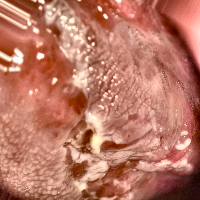

In [ ]:
example_img_contrast=img_Contrast(example_img)
cv2_imshow(example_img_contrast)

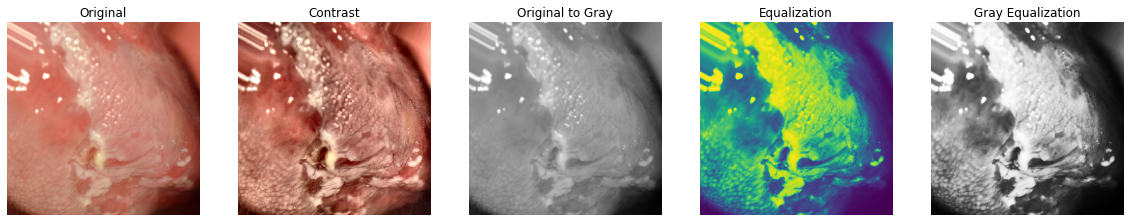

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt


#1
example_img=cv2.imread("/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/train/1.Cancer/can_1.jpg_0_2811.jpg")
example_img_ori = cv2.cvtColor(example_img,cv2.COLOR_BGR2RGB)

#2
example_img_contrast=img_Contrast(example_img)

#3
example_img_gray = cv2.cvtColor(example_img_ori,cv2.COLOR_RGB2GRAY)

#4
example_img_equalize=cv2.imread("/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/train/1.Cancer/can_1.jpg_0_2811.jpg",0)
example_img_equalize=cv2.equalizeHist(example_img_equalize)



plt.figure(figsize=(20,4))
imgae1=plt.subplot(1,5,1)
imgae1.set_title('Original')
plt.axis('off')
plt.imshow(example_img_ori)


imgae2=plt.subplot(1,5,2)
imgae2.set_title('Contrast')
plt.axis('off')
plt.imshow(example_img_contrast)


imgae3=plt.subplot(1,5,3)
imgae3.set_title('Original to Gray')
plt.axis('off')
plt.imshow(example_img_gray, cmap="gray")



imgae4=plt.subplot(1,5,4)
imgae4.set_title('Equalization')
plt.axis('off')
plt.imshow(example_img_equalize)


imgae5=plt.subplot(1,5,5)
imgae5.set_title('Gray Equalization')
plt.axis('off')
plt.imshow(example_img_equalize,cmap="gray")



plt.show()


## **Train**

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array, load_img

import os
import numpy as np
from PIL import Image

path1 = "/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/train/1.Cancer"

file_list = os.listdir(path1)

print ("file_list: {}".format(file_list))

n=len(file_list)
print("n=%d"%(n))
print(file_list[0])


file_list: ['can_1.jpg', 'can_2.jpg', 'can_3.jpg', 'can_4.jpg', 'can_5.jpg', 'can_6.jpg', 'can_8.jpg', 'can_9.jpg', 'can_10.jpg', 'can_11.jpg', 'can_12.jpg', 'can_13.jpg', 'can_14.jpg', 'can_15.jpg', 'can_15_1.jpg', 'can_16.jpg', 'can_17.jpg', 'can_17_1.jpg', 'can_18.jpg', 'can_19.jpg', 'can_20.jpg', 'can_21.jpg', 'can_22.jpg', 'can_22_1.jpg', 'can_23.jpg', 'can_24.jpg', 'can_25.jpg', 'can_26.jpg', 'can_27.jpg', 'can_28.jpg', 'can_30.jpg', 'can_29.jpg', 'can_31.jpg', 'can_32.jpg', 'can_32_1.jpg', 'can_33.jpg', 'can_34.jpg', 'can_35.jpg', 'can_36.jpg', 'can_37.jpg', 'can_37_1.jpg', 'can_38.jpg', 'can_39.jpg', 'can_40.jpg', 'can_40_1.jpg', 'can_41.jpg', 'can_42.jpg', 'can_43.jpg', 'can_44.jpg', 'can_51.jpg', 'can_52.jpg', 'can_53.jpg', 'can_53_1.jpg', 'can_53_2.jpg', 'can_55.jpg', 'can_54.jpg', 'can_57.jpg', 'can_56.jpg', 'can_58.jpg', 'can_59.jpg', 'can_59_1.jpg', 'can_59_2.jpg', 'can_63.jpg', 'can_60.jpg', 'can_60_1.jpg', 'can_62.jpg', 'can_61.jpg', 'can_61_1.jpg', 'can_45.jpg', 'can_4

In [ ]:
import cv2
def img_Contrast():
  
  for j in range(0,496):
    
    img = cv.imread('/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/train/1.Cancer/{}'.format(file_list[j]))
   
    # -----Converting image to LAB Color model----------------------------------- 
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) 
  
    # -----Splitting the LAB image to different channels------------------------- 
    l, a, b = cv2.split(lab) 
  
    # -----Applying CLAHE to L-channel------------------------------------------- 
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8)) 
    cl = clahe.apply(l) 
  
    # -----Merge the CLAHE enhanced L-channel with the a and b channel----------- 
    limg = cv2.merge((cl, a, b)) 
  
    # -----Converting image from LAB Color model to RGB model-------------------- 
    #final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR) 
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
    final=cv2.resize(final,dsize=(200,200),interpolation=cv2.INTER_LINEAR)

    
    cv.imwrite('/content/drive/Shareddrives/CTRC-OralDetect-Project/Generate-Contrast/train/1.Cancer/{}'.format(file_list[j]),final)
    cv2_imshow(final)
    cv.waitKey(0)
    cv.destroyAllWindows()

img_Contrast()

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array, load_img

import os
import numpy as np
from PIL import Image

path1 = "/content/drive/Shareddrives/CTRC-OralDetect-Project/Generate-Contrast/train/1.Cancer"

file_list = os.listdir(path1)

print ("file_list: {}".format(file_list))

n=len(file_list)
print("n=%d"%(n))
print(file_list[0])

file_list: ['can_1.jpg', 'can_2.jpg', 'can_3.jpg', 'can_4.jpg', 'can_5.jpg', 'can_6.jpg', 'can_8.jpg', 'can_9.jpg', 'can_10.jpg', 'can_11.jpg', 'can_12.jpg', 'can_13.jpg', 'can_14.jpg', 'can_15.jpg', 'can_15_1.jpg', 'can_16.jpg', 'can_17.jpg', 'can_17_1.jpg', 'can_18.jpg', 'can_19.jpg', 'can_20.jpg', 'can_21.jpg', 'can_22.jpg', 'can_22_1.jpg', 'can_23.jpg', 'can_24.jpg', 'can_25.jpg', 'can_26.jpg', 'can_27.jpg', 'can_28.jpg', 'can_30.jpg', 'can_29.jpg', 'can_31.jpg', 'can_32.jpg', 'can_32_1.jpg', 'can_33.jpg', 'can_34.jpg', 'can_35.jpg', 'can_36.jpg', 'can_37.jpg', 'can_37_1.jpg', 'can_38.jpg', 'can_39.jpg', 'can_40.jpg', 'can_40_1.jpg', 'can_41.jpg', 'can_42.jpg', 'can_43.jpg', 'can_44.jpg', 'can_51.jpg', 'can_52.jpg', 'can_53.jpg', 'can_53_1.jpg', 'can_53_2.jpg', 'can_55.jpg', 'can_54.jpg', 'can_57.jpg', 'can_56.jpg', 'can_58.jpg', 'can_59.jpg', 'can_59_1.jpg', 'can_59_2.jpg', 'can_63.jpg', 'can_60.jpg', 'can_60_1.jpg', 'can_62.jpg', 'can_61.jpg', 'can_61_1.jpg', 'can_45.jpg', 'can_4

In [ ]:
path2 = "/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/train/2.Precancer"

file_list = os.listdir(path2)

print ("file_list: {}".format(file_list))

n=len(file_list)
print("n=%d"%(n))
print(file_list[0])

file_list: ['precan_1.jpg', 'precan_2.jpg', 'precan_3.jpg', 'precan_4.jpg', 'precan_5.jpg', 'precan_6.jpg', 'precan_7.jpg', 'precan_8.jpg', 'precan_9.jpg', 'precan_10.jpg', 'precan_11.jpg', 'precan_12.jpg', 'precan_13.jpg', 'precan_14.jpg', 'precan_15.jpg', 'precan_16.jpg', 'precan_17.jpg', 'precan_18.jpg', 'precan_19.jpg', 'precan_20.jpg', 'precan_21.jpg', 'precan_22.jpg', 'precan_23.jpg', 'precan_24.jpg', 'precan_25.jpg', 'precan_26.jpg', 'precan_27.jpg', 'precan_28.jpg', 'precan_29.jpg', 'precan_30.jpg', 'precan_31.jpg', 'precan_32.jpg', 'precan_33.jpg', 'precan_34.jpg', 'precan_35.jpg', 'precan_36.jpg', 'precan_37.jpg', 'precan_38.jpg', 'precan_39.jpg', 'precan_40.jpg', 'precan_42.jpg', 'precan_43.jpg', 'precan_41.jpg', 'precan_44.jpg', 'precan_45.jpg', 'precan_46.jpg', 'precan_8.jpg_0_2718.jpg', 'precan_8.jpg_0_2004.jpg', 'precan_8.jpg_0_9166.jpg', 'precan_7.jpg_0_147.jpg', 'precan_7.jpg_0_8579.jpg', 'precan_7.jpg_0_1574.jpg', 'precan_6.jpg_0_3973.jpg', 'precan_6.jpg_0_4734.jpg', 

In [ ]:
import cv2
def img_Contrast2():
  
  for j in range(0,184):
    
    img = cv.imread('/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/train/2.Precancer/{}'.format(file_list[j]))
   
    # -----Converting image to LAB Color model----------------------------------- 
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) 
  
    # -----Splitting the LAB image to different channels------------------------- 
    l, a, b = cv2.split(lab) 
  
    # -----Applying CLAHE to L-channel------------------------------------------- 
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8)) 
    cl = clahe.apply(l) 
  
    # -----Merge the CLAHE enhanced L-channel with the a and b channel----------- 
    limg = cv2.merge((cl, a, b)) 
  
    # -----Converting image from LAB Color model to RGB model-------------------- 
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
    final=cv2.resize(final,dsize=(200,200),interpolation=cv2.INTER_LINEAR)
    
    cv.imwrite('/content/drive/Shareddrives/CTRC-OralDetect-Project/Generate-Contrast/train/2.Precancer/{}'.format(file_list[j]),final)
    cv2_imshow(final)
    cv.waitKey(0)
    cv.destroyAllWindows()

img_Contrast2()

In [ ]:
path2 = "/content/drive/Shareddrives/CTRC-OralDetect-Project/Generate-Contrast/train/2.Precancer"

file_list = os.listdir(path2)

print ("file_list: {}".format(file_list))

n=len(file_list)
print("n=%d"%(n))
print(file_list[0])

file_list: ['precan_1.jpg', 'precan_2.jpg', 'precan_3.jpg', 'precan_4.jpg', 'precan_5.jpg', 'precan_6.jpg', 'precan_7.jpg', 'precan_8.jpg', 'precan_9.jpg', 'precan_10.jpg', 'precan_11.jpg', 'precan_12.jpg', 'precan_13.jpg', 'precan_14.jpg', 'precan_15.jpg', 'precan_16.jpg', 'precan_17.jpg', 'precan_18.jpg', 'precan_19.jpg', 'precan_20.jpg', 'precan_21.jpg', 'precan_22.jpg', 'precan_23.jpg', 'precan_24.jpg', 'precan_25.jpg', 'precan_26.jpg', 'precan_27.jpg', 'precan_28.jpg', 'precan_29.jpg', 'precan_30.jpg', 'precan_31.jpg', 'precan_32.jpg', 'precan_33.jpg', 'precan_34.jpg', 'precan_35.jpg', 'precan_36.jpg', 'precan_37.jpg', 'precan_38.jpg', 'precan_39.jpg', 'precan_40.jpg', 'precan_42.jpg', 'precan_43.jpg', 'precan_41.jpg', 'precan_44.jpg', 'precan_45.jpg', 'precan_46.jpg', 'precan_8.jpg_0_2718.jpg', 'precan_8.jpg_0_2004.jpg', 'precan_8.jpg_0_9166.jpg', 'precan_7.jpg_0_147.jpg', 'precan_7.jpg_0_8579.jpg', 'precan_7.jpg_0_1574.jpg', 'precan_6.jpg_0_3973.jpg', 'precan_6.jpg_0_4734.jpg', 

In [ ]:
path3 = "/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/train/3.Inflammatory"

file_list = os.listdir(path3)

print ("file_list: {}".format(file_list))

n=len(file_list)
print("n=%d"%(n))
print(file_list[0])

file_list: ['inf_1.jpg', 'inf_2.jpg', 'inf_3.jpg', 'inf_4.jpg', 'inf_5.jpg', 'inf_5_1.jpg', 'inf_6.jpg', 'inf_6_1.jpg', 'inf_7.jpg', 'inf_8.jpg', 'inf_9.jpg', 'inf_10.jpg', 'inf_11.jpg', 'inf_11_1.jpg', 'inf_12.jpg', 'inf_13.jpg', 'inf_13_1.jpg', 'inf_14.jpg', 'inf_14_1.jpg', 'inf_15.jpg', 'inf_16.jpg', 'inf_17.jpg', 'inf_18.jpg', 'inf_19.jpg', 'inf_20.jpg', 'inf_21.jpg', 'inf_22.jpg', 'inf_23.jpg', 'inf_23_1.jpg', 'inf_24.jpg', 'inf_24_1.jpg', 'inf_25.jpg', 'inf_25_1.jpg', 'inf_25_2.jpg', 'inf_26.jpg', 'inf_27.jpg', 'inf_28.jpg', 'inf_29.jpg', 'inf_30.jpg', 'inf_31.jpg', 'inf_32.jpg', 'inf_33.jpg', 'inf_34.jpg', 'inf_35.jpg', 'inf_36.jpg', 'inf_37.jpg', 'inf_38.jpg', 'inf_39.jpg', 'inf_40.jpg', 'inf_41.jpg', 'inf_42.jpg', 'inf_43.jpg', 'inf_44.jpg', 'inf_45.jpg', 'inf_45_1.jpg', 'inf_46.jpg', 'inf_47.jpg', 'inf_48.jpg', 'inf_49.jpg', 'inf_50.jpg', 'inf_51.jpg', 'inf_52.jpg', 'inf_53.jpg', 'inf_54.jpg', 'inf_55.jpg', 'inf_56.jpg', 'inf_57.jpg', 'inf_58.jpg', 'inf_59.jpg', 'inf_60.jpg',

In [ ]:
import cv2
def img_Contrast3():
  
  for j in range(0,316):
    
    img = cv.imread('/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/train/3.Inflammatory/{}'.format(file_list[j]))
   
    # -----Converting image to LAB Color model----------------------------------- 
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) 
  
    # -----Splitting the LAB image to different channels------------------------- 
    l, a, b = cv2.split(lab) 
  
    # -----Applying CLAHE to L-channel------------------------------------------- 
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8)) 
    cl = clahe.apply(l) 
  
    # -----Merge the CLAHE enhanced L-channel with the a and b channel----------- 
    limg = cv2.merge((cl, a, b)) 
  
    # -----Converting image from LAB Color model to RGB model-------------------- 
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
    final=cv2.resize(final,dsize=(200,200),interpolation=cv2.INTER_LINEAR)
    
    cv.imwrite('/content/drive/Shareddrives/CTRC-OralDetect-Project/Generate-Contrast/train/.Inflammatory/{}'.format(file_list[j]),final)
    cv2_imshow(final)
    cv.waitKey(0)
    cv.destroyAllWindows()

img_Contrast3()

In [ ]:
path4 = "/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/train/4.Normal"

file_list = os.listdir(path4)

print ("file_list: {}".format(file_list))

n=len(file_list)
print("n=%d"%(n))
print(file_list[0])

file_list: ['nor_232_2.jpg', 'nor_232_4.jpg', 'nor_231_6.jpg', 'nor_231_5.jpg', 'nor_233_2.jpg', 'nor_232_5.jpg', 'nor_233_1.jpg', 'nor_233.jpg', 'nor_233_3.jpg', 'nor_234.jpg', 'nor_233_4.jpg', 'nor_233_6.jpg', 'nor_233_5.jpg', 'nor_234_2.jpg', 'nor_234_1.jpg', 'nor_234_3.jpg', 'nor_234_4.jpg', 'nor_234_6.jpg', 'nor_234_7.jpg', 'nor_234_5.jpg', 'nor_235_1.jpg', 'nor_235_3.jpg', 'nor_235_2.jpg', 'nor_235.jpg', 'nor_235_5.jpg', 'nor_235_4.jpg', 'nor_236.jpg', 'nor_236_1.jpg', 'nor_235_6.jpg', 'nor_237_1.jpg', 'nor_236_2.jpg', 'nor_237_2.jpg', 'nor_236_3.jpg', 'nor_237.jpg', 'nor_237_5.jpg', 'nor_237_4.jpg', 'nor_237_3.jpg', 'nor_238_3.jpg', 'nor_238.jpg', 'nor_238_1.jpg', 'nor_238_2.jpg', 'nor_239_3.jpg', 'nor_238_4.jpg', 'nor_239.jpg', 'nor_239_2.jpg', 'nor_239_1.jpg', 'nor_239_4.jpg', 'nor_239_6.jpg', 'nor_239_5.jpg', 'nor_240_1.jpg', 'nor_240_3.jpg', 'nor_240_2.jpg', 'nor_240.jpg', 'nor_240_4.jpg', 'nor_241_2.jpg', 'nor_241_1.jpg', 'nor_240_5.jpg', 'nor_241.jpg', 'nor_241_3.jpg', 'no

In [ ]:
import cv2
def img_Contrast4():
  
  for j in range(0,1365):
    
    img = cv.imread('/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/train/4.Normal/{}'.format(file_list[j]))
   
    # -----Converting image to LAB Color model----------------------------------- 
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) 
  
    # -----Splitting the LAB image to different channels------------------------- 
    l, a, b = cv2.split(lab) 
  
    # -----Applying CLAHE to L-channel------------------------------------------- 
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8)) 
    cl = clahe.apply(l) 
  
    # -----Merge the CLAHE enhanced L-channel with the a and b channel----------- 
    limg = cv2.merge((cl, a, b)) 
  
    # -----Converting image from LAB Color model to RGB model-------------------- 
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
    final=cv2.resize(final,dsize=(200,200),interpolation=cv2.INTER_LINEAR)
    
    cv.imwrite('/content/drive/Shareddrives/CTRC-OralDetect-Project/Generate-Contrast/train/2.Precancer/{}'.format(file_list[j]),final)
    cv2_imshow(final)
    cv.waitKey(0)
    cv.destroyAllWindows()

img_Contrast4()